In [53]:
# Load basic libraries
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# read in ARFF file
arff_file = arff.loadarff('Training_Dataset.arff')
df = pd.DataFrame(arff_file[0])

# Change from byte strings to ints
for col in df.select_dtypes([np.object_, 'object']).columns:
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

    # Try converting to numeric if possible
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Leave as string if conversion fails


# Grab necessary features from data
features_to_consider = ["having_IP_Address", "URL_Length", "having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain", "URL_of_Anchor", "HTTPS_token", "SFH", "Iframe"]
X = df[features_to_consider].values
y = df["Result"].values



In [ ]:
# Start of Using a Logistic classifier instead
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
 
coefficients = model.coef_[0] 

# Print out coefficients, so we can use it in the sigmoid function in the chrome extension 
for i, coef in enumerate(coefficients):
    feature_name = features_to_consider[i]
    
    print("Feature", feature_name, np.round(coef, decimals = 2))


print("Accuracy", accuracy)
print("Intercept", model.intercept_)

# Feature list is
# having_IP_Address, 0.36
# having_At_Symbol, 0.21
# double_slash_redirecting -0.15
# Prefix_Suffix 3.08
# having_Sub_Domain 0.65
# URL_of_Anchor 3.63
# HTTPS_token -0.29
# SFH 0.86
# Iframe -0.16
# sigmoid function is z = intercept + coef*featureval + ...
# 1/ 1+e^-z
# Intercept [4.50696702]
# accuracy is around 0.85


Feature having_IP_Address 0.35
Feature URL_Length 0.07
Feature having_At_Symbol 0.2
Feature double_slash_redirecting -0.15
Feature Prefix_Suffix 3.08
Feature having_Sub_Domain 0.69
Feature URL_of_Anchor 3.57
Feature HTTPS_token -0.25
Feature SFH 0.79
Feature Iframe -0.32
Accuracy 0.8584350972410674
Intercept [4.3769593]


<function matplotlib.pyplot.show(close=None, block=None)>

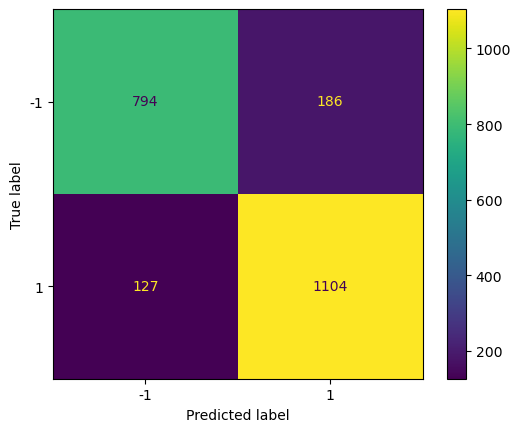

In [55]:
# confusion matrix check
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
display =  metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])
display.plot()
plt.show

In [56]:
from sklearn.metrics import precision_score

# Try the Model with different thresholds, gauge Accuracy
threshholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for i in threshholds:
    prob = (model.predict_proba(X_test)[:, 1] >= i).astype(int) 
    y_new_pred = (prob >= 0.5).astype(int)
    y_new_pred = 2 * y_new_pred - 1
    
    precision = precision_score(y_test, y_new_pred)
    accuracy = accuracy_score(y_test, y_new_pred)

    print("For ", i, precision, accuracy)

# May consider going to 0.6, the precision increases by 4 and accuracy only decreases by one
# should only warn the user of potential phishing activiting on 0.6

For  0.1 0.7666874610106051 0.8299412030755314
For  0.2 0.7876844130853111 0.8489371325192221
For  0.3 0.7893713545042126 0.8471279963817278
For  0.4 0.8504113687359761 0.8670284938941656
For  0.5 0.8558139534883721 0.8584350972410674
For  0.6 0.9090064995357474 0.8417005879692447
For  0.7 0.9135922330097087 0.8285843509724107
For  0.8 0.94875 0.76797829036635
